In [9]:
from mcnpy.endf.read_endf import read_endf
from mcnpy.plotting import PlotBuilder
import numpy as np

In [10]:
Fe56_endf_jeff40 = '/share_snc/snc/JuanMonleon/jeff40_with_MF4_from_jeff33/26-Fe-56g.txt'

endf_40 = read_endf(Fe56_endf_jeff40)


/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


In [12]:
# Check what MF sections are available
print("Available MF sections:", list(endf_40.mf.keys()))

# Check MF34 specifically
if 34 in endf_40.mf:
    print("\nMF34 is available!")
    mf34_obj = endf_40.mf[34]
    print(f"MF34 type: {type(mf34_obj)}")
    print(f"MF34 attributes: {dir(mf34_obj)}")
    if hasattr(mf34_obj, 'mt'):
        print("Available MT in MF34:", list(mf34_obj.mt.keys()) if hasattr(mf34_obj.mt, 'keys') else mf34_obj.mt)
else:
    print("\nMF34 is NOT available")

# Check MF4
if 4 in endf_40.mf:
    print("\nMF4 is available!")
    mf4_obj = endf_40.mf[4]
    print(f"MF4 type: {type(mf4_obj)}")
    if hasattr(mf4_obj, 'mt'):
        print("Available MT in MF4:", list(mf4_obj.mt.keys()) if hasattr(mf4_obj.mt, 'keys') else mf4_obj.mt)
else:
    print("\nMF4 is NOT available")

Available MF sections: [1, 4, 34]

MF34 is available!
MF34 type: <class 'mcnpy.endf.classes.mf.MF'>
MF34 attributes: ['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_section', 'get_section', 'mt', 'num_lines', 'number', 'sections', 'to_ang_covmat', 'to_plot_data']
Available MT in MF34: [2]

MF4 is available!
MF4 type: <class 'mcnpy.endf.classes.mf.MF'>
Available MT in MF4: [2, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 600, 601, 602, 603, 604, 605, 606, 607, 608, 60

In [13]:
# Test the exact condition used in the streamlit app
print("Testing: 34 in endf_40.mf")
print(f"Result: {34 in endf_40.mf}")

print("\nTesting: 34 in endf_40.mf.keys()")
print(f"Result: {34 in endf_40.mf.keys()}")

print("\nTesting: 34 not in endf_40.mf")
print(f"Result: {34 not in endf_40.mf}")

Testing: 34 in endf_40.mf
Result: True

Testing: 34 in endf_40.mf.keys()
Result: True

Testing: 34 not in endf_40.mf
Result: False


In [14]:
# Check the type and behavior of endf_40.mf
print(f"Type of endf_40.mf: {type(endf_40.mf)}")
print(f"\nHas __contains__: {hasattr(endf_40.mf, '__contains__')}")
print(f"Has keys(): {hasattr(endf_40.mf, 'keys')}")

# Try different ways to access
print(f"\nDirect access endf_40.mf[34]: {type(endf_40.mf[34])}")

# Check if it's an attribute or dict access
print(f"\ndir(endf_40.mf): {[x for x in dir(endf_40.mf) if not x.startswith('_')]}")

Type of endf_40.mf: <class 'dict'>

Has __contains__: True
Has keys(): True

Direct access endf_40.mf[34]: <class 'mcnpy.endf.classes.mf.MF'>

dir(endf_40.mf): ['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [15]:
# Check the exact key types in endf_40.mf
print("Keys in endf_40.mf:")
for key in endf_40.mf.keys():
    print(f"  {key} (type: {type(key).__name__})")

print("\nTest different comparison methods:")
print(f"34 in endf_40.mf: {34 in endf_40.mf}")
print(f"'34' in endf_40.mf: {'34' in endf_40.mf}")
print(f"int(34) in endf_40.mf: {int(34) in endf_40.mf}")

Keys in endf_40.mf:
  1 (type: int)
  4 (type: int)
  34 (type: int)

Test different comparison methods:
34 in endf_40.mf: True
'34' in endf_40.mf: False
int(34) in endf_40.mf: True


In [16]:
# Test the exact code path from streamlit
endf_obj = endf_40

print("Simulating Streamlit code:")
print(f"34 in endf_obj.mf: {34 in endf_obj.mf}")
print(f"34 not in endf_obj.mf: {34 not in endf_obj.mf}")

if 34 not in endf_obj.mf:
    print("\nWARNING: This file does not contain MF34 data")
else:
    print("\nMF34 found! Getting MT keys...")
    available_mts = list(endf_obj.mf[34].mt.keys())
    print(f"available_mts = {available_mts}")
    print(f"Type: {type(available_mts)}")
    print(f"Length: {len(available_mts)}")
    print(f"Bool value: {bool(available_mts)}")

Simulating Streamlit code:
34 in endf_obj.mf: True
34 not in endf_obj.mf: False

MF34 found! Getting MT keys...
available_mts = [2]
Type: <class 'list'>
Length: 1
Bool value: True


Test 1: Extracting MF4 data with uncertainties...
✓ Tuple returned: data has 3960 points
✓ Uncertainty band present: 42 points

Test 2: Applying styling with apply_styling()...
✓ Styled data label: JEFF-40 Test
✓ Styled data color: #1f77b4

Test 3: Building plot with PlotBuilder...
✓ Plot built successfully!

All API tests passed! ✓


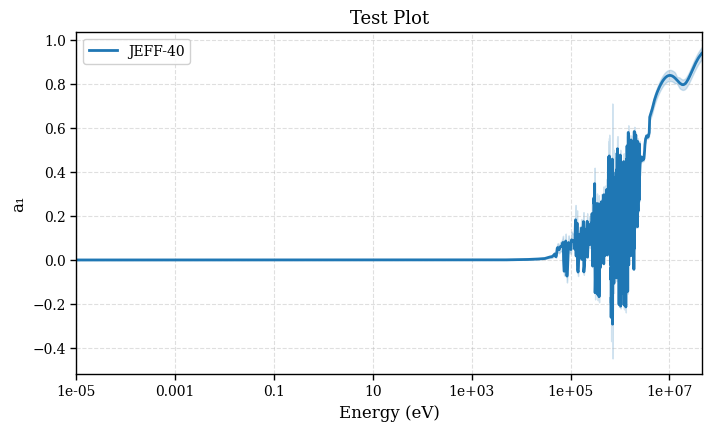

In [5]:
# Test the correct API usage
# This should work without errors now

# Test 1: Extract data with uncertainties (returns tuple)
print("Test 1: Extracting MF4 data with uncertainties...")
plot_data_tuple = endf_40.to_plot_data(
    mf=4,
    mt=2,
    order=1,
    uncertainty=True,  # Correct parameter name
    sigma=1.0  # Correct parameter name
)

if isinstance(plot_data_tuple, tuple):
    data_obj, unc_band = plot_data_tuple
    print(f"✓ Tuple returned: data has {len(data_obj.x)} points")
    if unc_band:
        print(f"✓ Uncertainty band present: {len(unc_band.x)} points")
    else:
        print("  No uncertainty band (MF34 not available)")
else:
    print(f"✓ Single PlotData returned: {len(plot_data_tuple.x)} points")

# Test 2: Apply styling separately using apply_styling()
print("\nTest 2: Applying styling with apply_styling()...")
if isinstance(plot_data_tuple, tuple):
    data_obj, _ = plot_data_tuple
else:
    data_obj = plot_data_tuple

styled_data = data_obj.apply_styling(
    label="JEFF-40 Test",
    color="#1f77b4",
    linestyle="-",
    linewidth=2.0,
    marker="o",
    markersize=6
)
print(f"✓ Styled data label: {styled_data.label}")
print(f"✓ Styled data color: {styled_data.color}")

# Test 3: Create plot with PlotBuilder
print("\nTest 3: Building plot with PlotBuilder...")
builder = PlotBuilder(figsize=(10, 6))
if isinstance(plot_data_tuple, tuple):
    data_obj, unc_band = plot_data_tuple
    styled_data = data_obj.apply_styling(label="JEFF-40", color="#1f77b4")
    if unc_band:
        unc_band.color = "#1f77b4"
    builder.add_data(styled_data, uncertainty=unc_band)
else:
    styled_data = plot_data_tuple.apply_styling(label="JEFF-40", color="#1f77b4")
    builder.add_data(styled_data)

builder.set_labels(title="Test Plot", x_label="Energy (eV)", y_label="a₁")
builder.set_scales(log_x=True)
fig = builder.build()
print("✓ Plot built successfully!")

print("\n" + "="*50)
print("All API tests passed! ✓")
